In [67]:
import pandas as pd
from utils.data_processing import *
from utils.visualization import *


In [68]:
# LCA_POSTERIOR_PROBABILITIES_PATH: This store the posterior probabilities for all the latent classes, so we can combine small classes to larger classes
# LCA_LATENT_CLASS_DATA_PATH: This stores the patients that are classified to different subgroups based on LCA

LCA_POSTERIOR_PROBABILITIES_PATH = "data/processed_data/LCA_posterior_probabilities.csv"
LCA_LATENT_CLASS_DATA_PATH = "data/processed_data/LCA_latent_class_data.csv"
SOFA_DATA_PATH = "data/raw_data/sofa.csv"
OASIS_DATA_PATH = "data/raw_data/oasis.csv"
ANGUS_DATA_PATH = "data/raw_data/angus.csv"
SEPSIS_DATA_PATH = "data/raw_data/sepsis.csv"
PATIENT_DATA_PATH = "data/raw_data/patients.csv"
NUM_LATENT_CLASSES = 6

In [69]:
df = pd.read_csv(LCA_LATENT_CLASS_DATA_PATH)
df_prob = pd.read_csv(LCA_POSTERIOR_PROBABILITIES_PATH)
sofa = pd.read_csv(SOFA_DATA_PATH)
oasis = pd.read_csv(OASIS_DATA_PATH)
angus = pd.read_csv(ANGUS_DATA_PATH)
sepsis = pd.read_csv(SEPSIS_DATA_PATH)
patients = pd.read_csv(PATIENT_DATA_PATH)
# reassign the class if the number of classes are more than 6
df, classes_distribution = reassign_classes(df,df_prob,num_classes=NUM_LATENT_CLASSES)
display(df.head(5))
print(classes_distribution)
classes_mapping = {1:4,2:1,3:3,4:6,5:2,6:5}
df = process_morbidity_data(df,classes_mapping)

display(df.head(5))

,subject_id,admission_type,gender,age_bucket,age_at_admission,hadm_id,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,...,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression,class_assignment
0,3,0,0,65-84,76,145834,2,1,1,1,...,1,2,1,1,1,1,1,1,1,1
1,4,0,1,45-64,47,185777,1,1,1,1,...,1,2,2,1,1,1,1,1,1,3
2,6,1,1,65-84,65,107064,1,1,1,1,...,1,1,2,1,1,1,1,1,1,5
3,9,0,0,25-44,41,150750,2,1,1,1,...,1,1,2,1,1,1,1,1,1,3
4,12,1,0,65-84,72,112213,1,1,1,1,...,1,1,1,1,1,1,1,1,1,7


class_assignment
7    0.248037
1    0.232473
5    0.199424
6    0.155833
3    0.102223
2    0.062009
Name: count, dtype: float64


,subject_id,admission_type,gender,age_bucket,age_at_admission,hadm_id,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,...,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression,class_assignment,count_morbidity,percent
12802,19641,0,1,65-84,75,167936,0,0,0,0,...,0,0,0,0,0,0,0,6,0,3.454921
18456,28193,0,0,16-24,19,103431,0,0,0,0,...,0,0,0,0,0,0,0,2,0,33.626916
30005,73767,1,1,45-64,52,145374,0,0,0,0,...,0,0,0,0,0,0,0,2,0,33.626916
18459,28196,0,0,25-44,29,110639,0,0,0,0,...,0,0,0,0,0,0,0,2,0,33.626916
3120,4743,0,0,25-44,39,123912,0,0,0,0,...,0,0,0,0,0,0,0,2,0,33.626916


/workspaces/environment/LCA_Analysis/utils/visualization.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


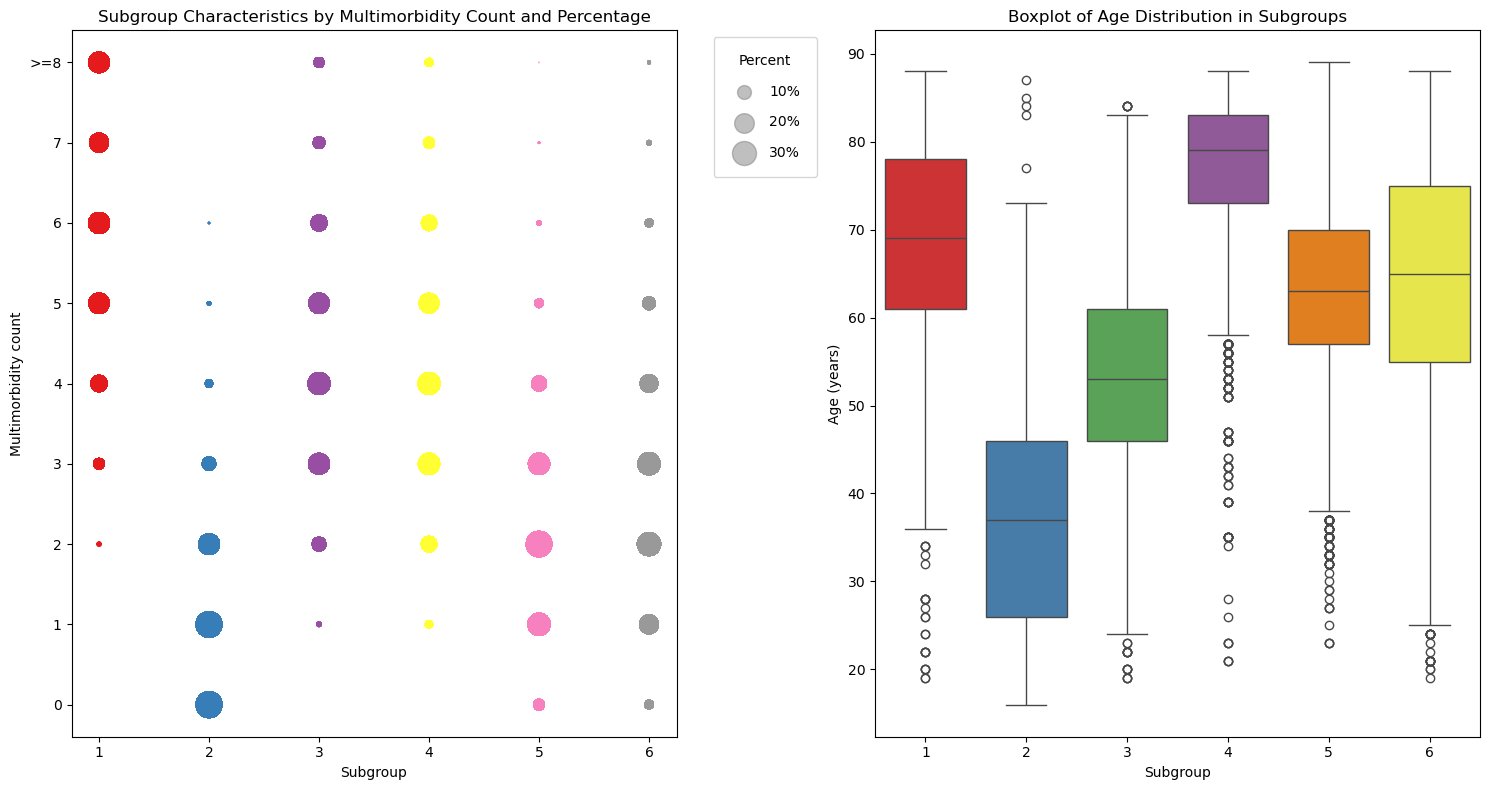

In [70]:
plot_subgroup_characteristics(df, bubble_size_scale=10, save_plots=True, output_dir="plots")

Processing class 1 vs. all
Cross-validated AUC-ROC for class 1 vs. all: 0.986
Processing class 2 vs. all
Cross-validated AUC-ROC for class 2 vs. all: 0.993
Processing class 3 vs. all
Cross-validated AUC-ROC for class 3 vs. all: 0.971
Processing class 4 vs. all
Cross-validated AUC-ROC for class 4 vs. all: 0.964
Processing class 5 vs. all
Cross-validated AUC-ROC for class 5 vs. all: 0.914
Processing class 6 vs. all
Cross-validated AUC-ROC for class 6 vs. all: 0.936


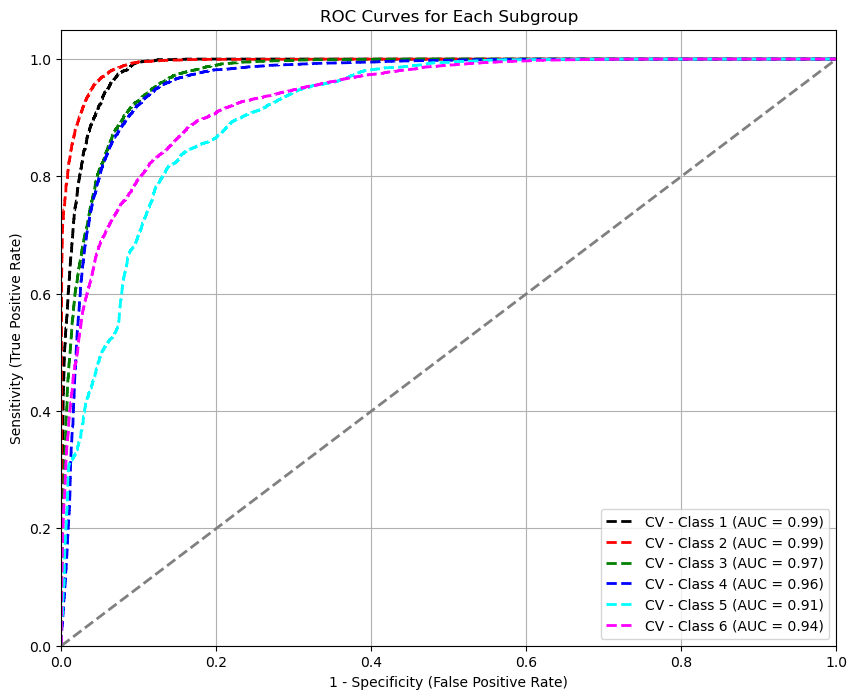

In [5]:
cols_used_LCA = ["admission_type", "gender", "age_at_admission", "congestive_heart_failure", "cardiac_arrhythmias",
                 "valvular_disease", "pulmonary_circulation", "peripheral_vascular", "hypertension", "paralysis",
                 "other_neurological", "chronic_pulmonary", "diabetes_uncomplicated", "diabetes_complicated",
                 "hypothyroidism", "renal_failure", "liver_disease", "peptic_ulcer", "aids", "lymphoma",
                 "metastatic_cancer", "solid_tumor", "rheumatoid_arthritis", "coagulopathy", "obesity", "weight_loss",
                 "fluid_electrolyte", "blood_loss_anemia", "deficiency_anemias", "alcohol_abuse", "drug_abuse",
                 "psychoses", "depression"]

colors = ['black', 'red', 'green', 'blue', 'cyan', 'magenta']

plot_roc_curves(df, cols_used_LCA, colors)

/workspaces/environment/LCA_Analysis/utils/visualization.py:247: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right', fontsize=10)


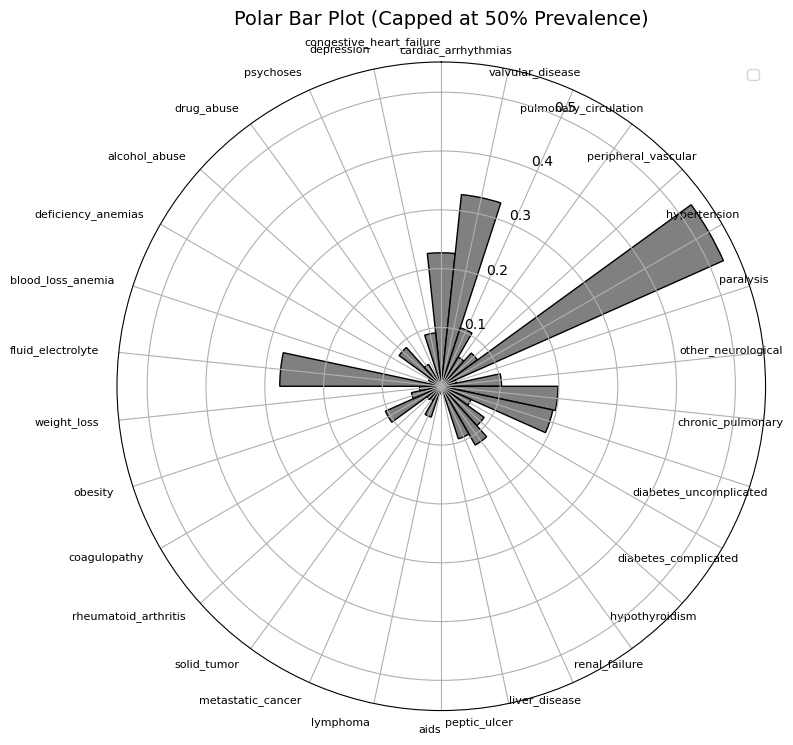

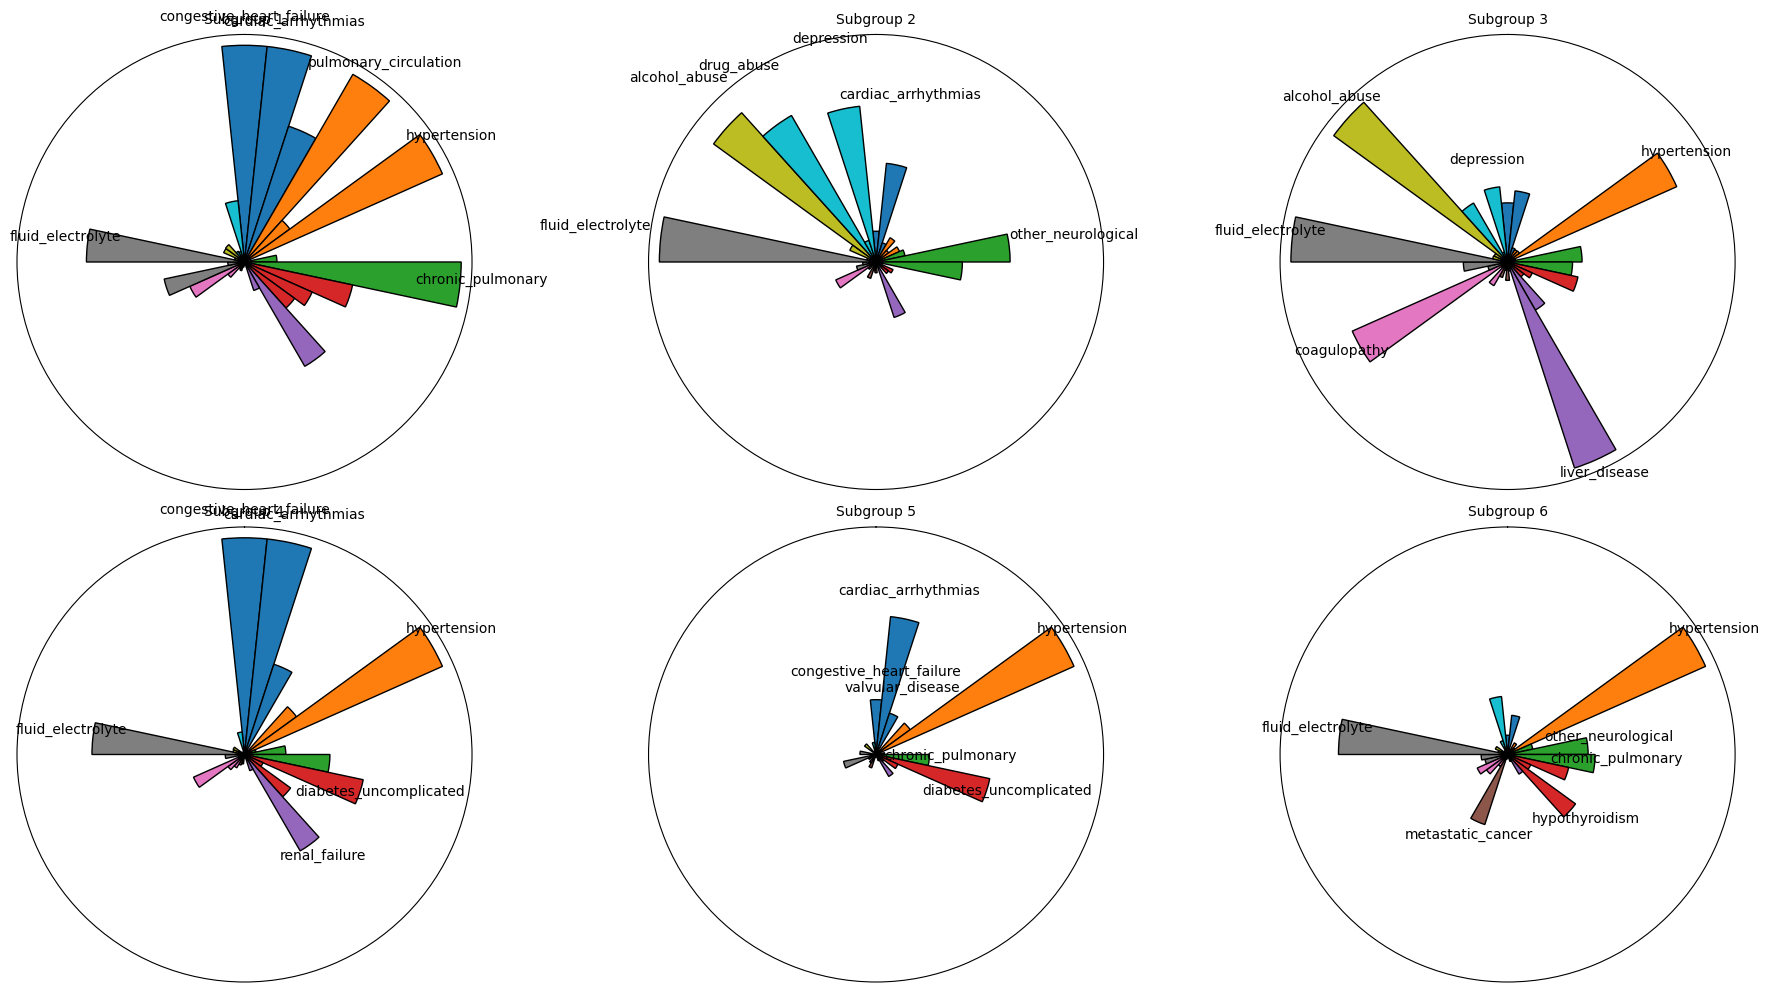

In [71]:
exclude_columns = ["subject_id", "hadm_id", "admission_type", "gender", "age_bucket", "age_at_admission","class_assignment","count_morbidity","percent","dichotomized_class"]
target_columns = ["class_assignment"]+[col for col  in df.columns if col not in(exclude_columns)]

mean_prevalence = df[target_columns].drop(columns=["class_assignment"]).mean()
mean_prevalence_subgroup = df[target_columns].groupby("class_assignment").mean()
# Normalize the prevalence to a maximum of 50%
normalized_prevalence = mean_prevalence.clip(upper=0.5)
normalized_prevalence_subgroup = mean_prevalence_subgroup.clip(upper=0.5)
plot_polar_all(mean_prevalence)
plot_polar_subgroup(normalized_prevalence_subgroup)



In [72]:
mean_prevalence_subgroup

,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,paralysis,other_neurological,chronic_pulmonary,diabetes_uncomplicated,...,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
class_assignment,,,,,,,,,,,,,,,,,,,,,
1,0.727313,0.574591,0.329349,0.647189,0.129261,0.640992,0.007525,0.074812,0.904825,0.254980,...,0.138114,0.189464,0.038513,0.364763,0.023462,0.052678,0.054006,0.028774,0.025675,0.142098
2,0.023604,0.076097,0.015501,0.021490,0.011978,0.019729,0.022723,0.102871,0.066232,0.004580,...,0.033821,0.015325,0.010217,0.166285,0.007222,0.022019,0.154131,0.129822,0.017439,0.120134
3,0.136412,0.164876,0.034640,0.033029,0.034103,0.427229,0.018797,0.171858,0.149839,0.165951,...,0.392320,0.046455,0.102041,0.559345,0.035177,0.033835,0.495972,0.157089,0.024168,0.174275
4,0.533239,0.713662,0.218916,0.010745,0.148188,0.688511,0.027158,0.095289,0.197072,0.280080,...,0.128823,0.014287,0.044397,0.351990,0.027276,0.028693,0.007439,0.004015,0.006612,0.052190
5,0.126494,0.319832,0.100266,0.007857,0.097388,0.706507,0.009407,0.019920,0.123063,0.268260,...,0.019367,0.076583,0.000000,0.037185,0.003431,0.002435,0.032758,0.008079,0.001881,0.028110
6,0.044460,0.090847,0.011838,0.031108,0.020509,0.517825,0.059463,0.185822,0.201927,0.143978,...,0.076669,0.053407,0.060977,0.390227,0.022712,0.030970,0.003992,0.010599,0.033723,0.134480


In [48]:
patients["dod_converion"] = patients["dod"].isna()
patients

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,dod_converion
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,True
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1,False
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0,True
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0,True
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0,True
...,...,...,...,...,...,...,...,...,...
46515,31840,44089,M,2026-05-25 00:00:00,NaN,NaN,NaN,0,True
46516,31841,44115,F,2124-07-27 00:00:00,NaN,NaN,NaN,0,True
46517,31842,44123,F,2049-11-26 00:00:00,2135-01-12 00:00:00,2135-01-12 00:00:00,NaN,1,False
46518,31843,44126,F,2076-07-25 00:00:00,NaN,NaN,NaN,0,True


/workspaces/environment/LCA_Analysis/utils/visualization.py:271: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


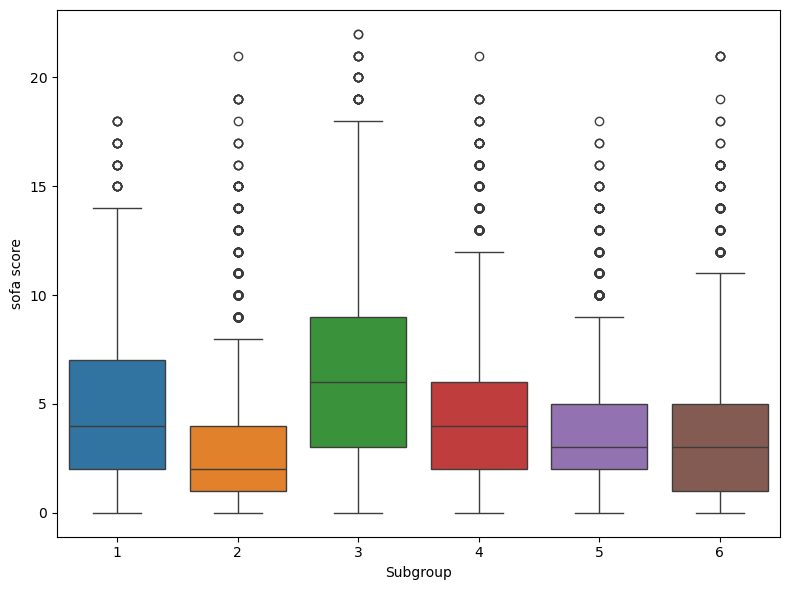

/workspaces/environment/LCA_Analysis/utils/visualization.py:271: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


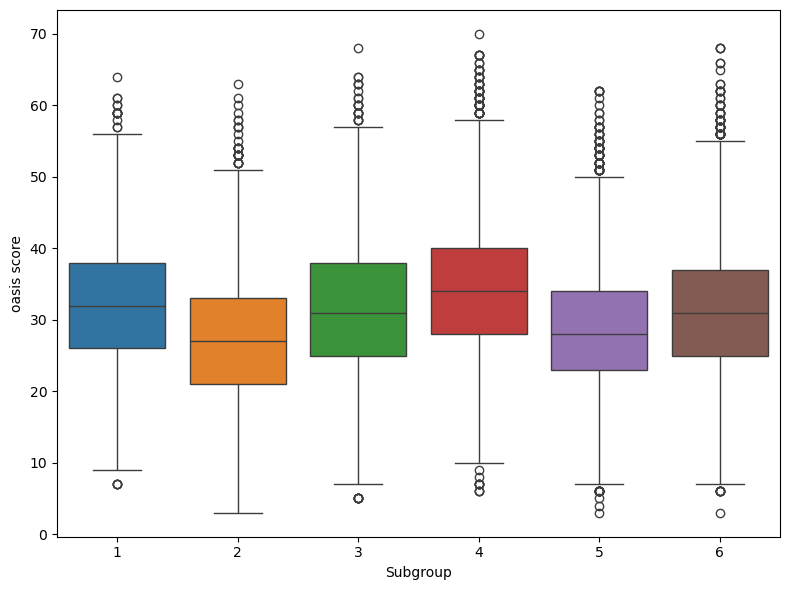

In [49]:
df_plot = df.copy()
df_plot = pd.merge(df_plot,sofa[["subject_id","hadm_id","sofa"]])
df_plot = pd.merge(df_plot,oasis[["subject_id","hadm_id","oasis"]])
df_plot = pd.merge(df_plot,angus[["subject_id","hadm_id","organ_dysfunction","explicit_sepsis"]])
df_plot = pd.merge(df_plot,sepsis[["subject_id","hadm_id","sepsis"]])
df_plot = pd.merge(df_plot,patients[["subject_id","dod_converion"]])
plot_boxplot_by_subgroup(df_plot,"sofa")
plot_boxplot_by_subgroup(df_plot,"oasis")

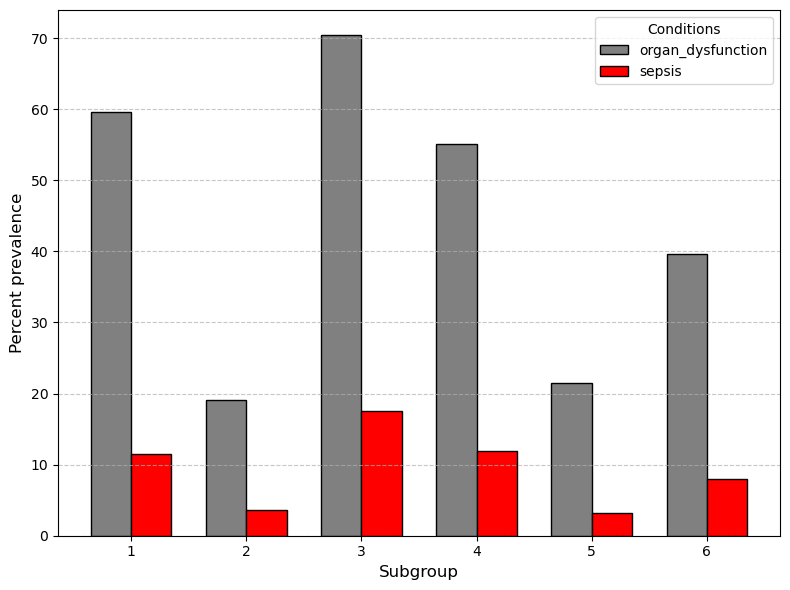

In [40]:
conditions = ["organ_dysfunction","sepsis"]
percentages = calculate_prevalence(df_plot, conditions,"Subgroup")
plot_bar(percentages, y_label="Percent prevalence", colors=["gray", "red", "green", "blue", "cyan", "pink"])

In [42]:
conditions = ["organ_dysfunction","sepsis"]
percentages = calculate_prevalence(df_plot, conditions,"Subgroup")
plot_bar(percentages, y_label="Percent mortality", colors=["gray", "red", "green", "blue", "cyan", "pink"])

Index(['subject_id', 'admission_type', 'gender', 'age_bucket',
       'age_at_admission', 'hadm_id', 'congestive_heart_failure',
       'cardiac_arrhythmias', 'valvular_disease', 'pulmonary_circulation',
       'peripheral_vascular', 'hypertension', 'paralysis',
       'other_neurological', 'chronic_pulmonary', 'diabetes_uncomplicated',
       'diabetes_complicated', 'hypothyroidism', 'renal_failure',
       'liver_disease', 'peptic_ulcer', 'aids', 'lymphoma',
       'metastatic_cancer', 'solid_tumor', 'rheumatoid_arthritis',
       'coagulopathy', 'obesity', 'weight_loss', 'fluid_electrolyte',
       'blood_loss_anemia', 'deficiency_anemias', 'alcohol_abuse',
       'drug_abuse', 'psychoses', 'depression', 'Subgroup', 'count_morbidity',
       'percent', 'sofa', 'oasis', 'organ_dysfunction', 'explicit_sepsis',
       'sepsis'],
      dtype='object')

In [64]:
x = df_plot[df_plot["organ_dysfunction"]==1]
x[["Subgroup","dod_converion"]].groupby(["Subgroup"]).sum()

,dod_converion
Subgroup,
1,839
2,964
3,1794
4,2082
5,1480
6,1643


In [65]:
x[["Subgroup","dod_converion"]].groupby(["Subgroup"]).count()

,dod_converion
Subgroup,
1,1805
2,1233
3,3757
4,6159
5,2197
6,3442


In [62]:
x = df_plot[df_plot["sepsis"]==1]
x[["Subgroup","dod_converion"]].groupby(["Subgroup"]).sum()

,dod_converion
Subgroup,
1,96
2,172
3,354
4,287
5,159
6,268


In [63]:
x[["Subgroup","dod_converion"]].groupby(["Subgroup"]).count()

,dod_converion
Subgroup,
1,349
2,231
3,934
4,1333
5,329
6,697
